In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv('../data/Season_2017.csv')

In [18]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [19]:
df2=pd.read_csv('../data/Playoffs_2017.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [20]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [21]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted','H_median_odds','A_median_odds','fav_win','home_fav'],axis=1)

In [22]:
df.home_win.value_counts(normalize=True)

1    0.539506
0    0.460494
Name: home_win, dtype: float64

In [23]:
df2.home_win.value_counts(normalize=True)

1    0.722222
0    0.277778
Name: home_win, dtype: float64

In [24]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYY,34.210526,4.052632,7.000000,3.789474,3.380526,3.526316,11.736842,38.315789,0.200579,...,8.000000,20.000000,7.000000,0.0,30.000000,7.000000,1.000000,0.043000,0.900000,1
1,ARI,34.714286,6.142857,9.571429,5.857143,6.251429,3.142857,9.571429,38.285714,0.263000,...,13.000000,17.000000,10.000000,0.0,33.000000,2.000000,1.000000,0.037000,-3.000000,1
2,ARI,34.714286,6.142857,9.571429,5.857143,6.251429,3.142857,9.571429,38.285714,0.263000,...,13.000000,17.000000,10.000000,0.0,33.000000,2.000000,1.000000,0.037000,-3.000000,1
3,CLE,33.636364,4.363636,6.000000,4.090909,3.477273,4.000000,12.090909,39.000000,0.175818,...,10.684211,12.210526,5.368421,0.0,53.263158,2.777778,0.388889,0.144684,1.015789,1
4,HOU,33.750000,4.700000,8.450000,4.400000,4.706000,3.400000,7.100000,37.700000,0.241200,...,8.166667,20.833333,10.333333,0.0,52.333333,2.000000,1.000000,0.103000,0.900000,1


In [25]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1,ARI,34.104938,5.012346,8.672840,4.790123,4.939444,3.567901,8.987654,38.419753,0.249259,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
2,STL,33.765432,4.697531,8.654321,4.493827,4.486728,3.660494,8.320988,38.388889,0.252457,...,11.839506,13.160494,6.592593,0.006173,49.012346,1.453416,0.472050,-0.011130,-0.415432,1
3,TEX,33.518519,4.932099,8.185185,4.666667,4.781358,3.358025,9.216049,37.790123,0.240247,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,0
4,MIL,33.691358,4.444444,8.351852,4.216049,4.273951,3.271605,9.697531,37.703704,0.243426,...,13.265432,13.413580,6.629630,0.018519,46.876543,1.465839,0.472050,0.015272,-0.198765,0


In [30]:
#for col in X_train.columns:
    #print(col)

In [40]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [27]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [28]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [29]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [30]:
X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [31]:
X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [41]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

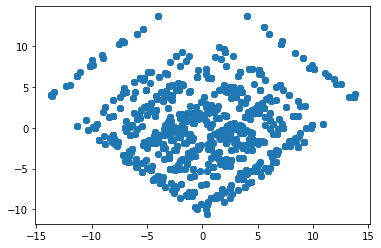

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [32]:
def feature_select(X_train,y_train,estimator,min_features,step=1):
    estimator2=estimator()
    selector=RFECV(estimator2,min_features_to_select=min_features,step=step)
    selector.fit(X_train,y_train)
    selector.ranking_
    feature_dict=dict(zip(X_train.columns, selector.ranking_))
    best_pred = [k for (k,v) in feature_dict.items() if v == 1]
    
    
    return best_pred

In [42]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [43]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

# Logistic Regression

In [35]:
def logreg(X_train, X_test, y_train, y_test, cv=5):
    
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=42, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    y_pred_proba = log.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = log.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
  
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(log, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    plot_confusion_matrix(log, X_test, y_test)
    return y_pred,y_pred_proba

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5818930041152263
Train Mean Accuracy: 0.5835390946502058
Test Mean Accuracy: 0.6481481481481481
Recall Score: 0.6923076923076923
Precision Score: 0.7941176470588235
F1 Score: 0.7397260273972601


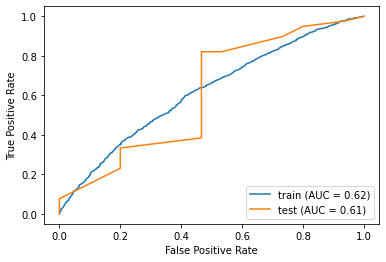

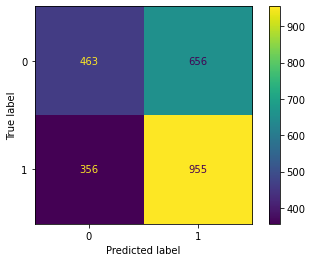

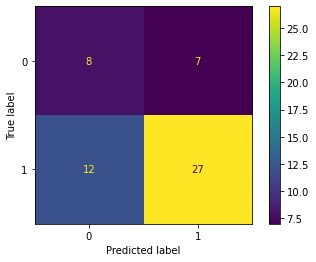

In [36]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### Home_win, zero imp
***

In [123]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [124]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5802469135802469
Train Mean Accuracy: 0.5876543209876544
Test Mean Accuracy: 0.6481481481481481
Recall Score: 0.6923076923076923
Precision Score: 0.7941176470588235
F1 Score: 0.7397260273972601


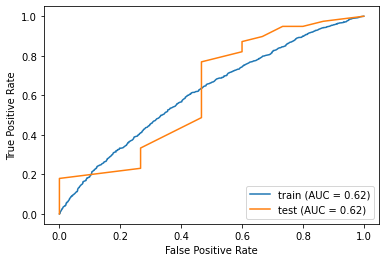

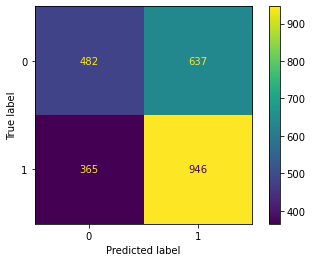

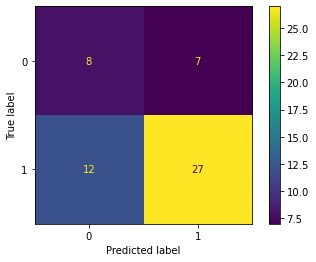

In [44]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

# KNN

In [73]:
#kfeats= feature_select(X_train_scaled,y_train,KNN,min_features=10)
#X_train_best_knn = X_train_scaled[kfeats]
#X_test_best_knn = X_test_scaled[kfeats]

In [46]:
def knn(X_train, X_test, y_train, y_test, metric='minkowski', cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_neighbors': [5,7,9,11,13,15,17],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}
    
    # Instantiate & fit KNN model for GridSearch
    grid_knn = KNeighborsClassifier()
    grid_knn.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    knn_params = gs.best_params_
    
    # Use best # of neighbors from best_params
    knn_neighbors = knn_params['n_neighbors']
    print(f'Number of Neighbors: {knn_neighbors}')
    
    # Use best metric from best_params
    knn_metric = knn_params['metric']
    print(f'Metric: {knn_metric}')
    
    # Use best weights from best_params
    knn_weights=knn_params['weights']
    print(f'Weights: {knn_weights}')
    
    # Instantiate & fit K-Nearest Neighbors model
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, metric=knn_metric,
                               weights=knn_weights)
    knn.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = knn.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = knn.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = knn.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(knn, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(knn, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(knn, X_train, y_train)
    plot_confusion_matrix(knn, X_test, y_test)

### Home win KNN

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5485596707818929
Train Mean Accuracy: 0.6226337448559671
Test Mean Accuracy: 0.5740740740740741
Recall Score: 0.6153846153846154
Precision Score: 0.75
F1 score: 0.676056338028169


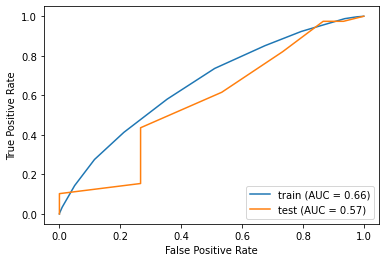

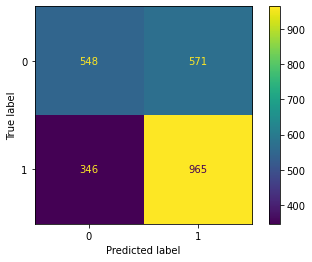

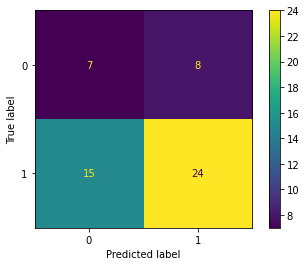

In [47]:
knn(zero_imp_train,zero_imp_test,y_train,y_test)

# Decision Tree

In [48]:
dfeats= feature_select(zero_imp_train,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = zero_imp_train[dfeats]
X_test_best_tree = zero_imp_test[dfeats]

In [49]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=42)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5551440329218107
Train Mean Accuracy: 0.594238683127572
Test Mean Accuracy: 0.5370370370370371
Recall Score: 0.5641025641025641
Precision Score: 0.7333333333333333
F1 score: 0.6376811594202899


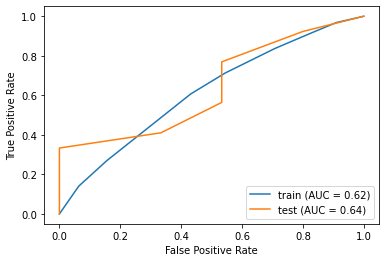

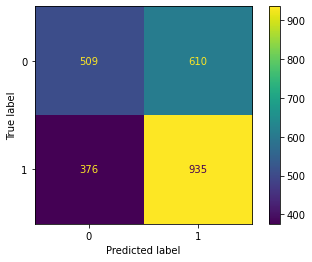

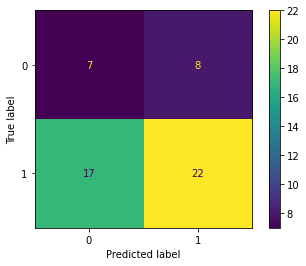

In [50]:
dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

# Random Forest

In [51]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

### Model

In [52]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);


Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.5173119511263841
Train Mean Accuracy: 0.6948105436573312
Test Mean Accuracy: 0.6285714285714286
Recall Score: 1.0
Precision Score: 0.6285714285714286
F1 score: 0.7719298245614035


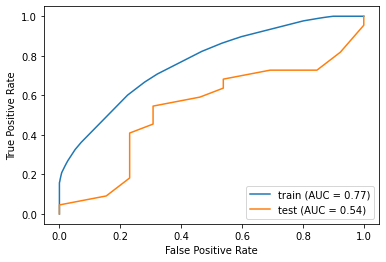

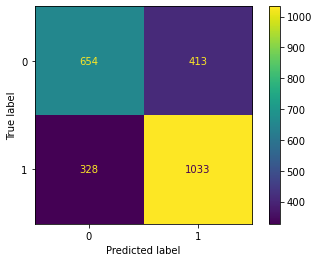

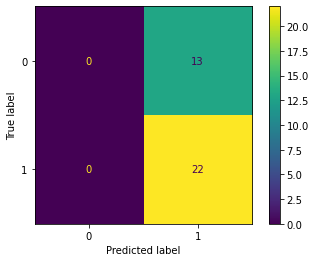

In [177]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

### RForest Home Win

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.5366255144032922
Train Mean Accuracy: 0.6921810699588478
Test Mean Accuracy: 0.7037037037037037
Recall Score: 0.8205128205128205
Precision Score: 0.7804878048780488
F1 score: 0.8


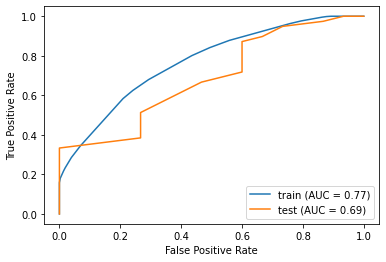

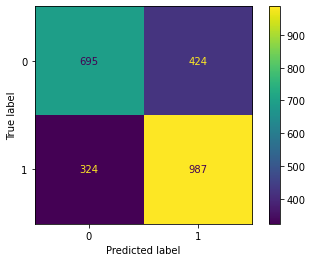

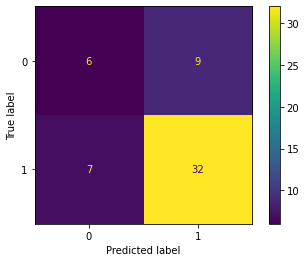

In [53]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

# Bagging Classifier

In [68]:
def bagged(X_train, X_test, y_train, y_test, cv=5):

    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'base_estimator__max_depth': [2,5,15],
    'base_estimator__criterion': ['gini', 'entropy'],
    'max_samples': [1,2,3,5],
    'max_features': [1,2,3,5],
    'n_estimators': [10,50,100,500]}
    
    # Instantiate & fit Bagging Classifier model for GridSearch
    grid_bag = BaggingClassifier(DecisionTreeClassifier(), random_state=42)
    grid_bag.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_bag, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    bag_params = gs.best_params_
    
    # Use best max depth from best_params
    bag_max_depth = bag_params['base_estimator__max_depth']
    print(f'Dec Tree Max Depth: {bag_max_depth}')
    
    # Use best criterion from best_params
    bag_criterion = bag_params['base_estimator__criterion']
    print(f'Dec Tree Criterion: {bag_criterion}')
    
    # Use best max samples from best_params
    bag_max_sample = bag_params['max_samples']
    print(f'Bagging Max Samples: {bag_max_sample}')
    
    # Use best max features from best_params
    bag_max_features = bag_params['max_features']
    print(f'Bag Max Features: {bag_max_features}')
    
    # Use best estimators from best_params
    bag_estimators = bag_params['n_estimators']
    print(f'# of Base Estimators: {bag_estimators}')
    
    # Instantiate & fit Bagging Classifier model
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=bag_max_depth,
                                criterion=bag_criterion), max_samples=bag_max_sample,
                                max_features=bag_max_features, n_estimators=bag_estimators,
                                random_state=42)
    bagging.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = bagging.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(bagging, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = bagging.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = bagging.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(bagging, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(bagging, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(bagging, X_train, y_train)
    plot_confusion_matrix(bagging, X_test, y_test);

In [185]:
#bagged(X_train_best_tree,X_test_best_tree,y_train,y_test)

# XGBoost

In [88]:
xfeats= feature_select(X_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = X_train[xfeats]
X_test_best_x = X_test[xfeats]

In [89]:
def xgboost(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'learning_rate': [.05,.1,.2,.3],
    'max_depth': [3,6,10],
    'min_child_weight': [1,2],
    'subsample': [.5,.7,1],
    'n_estimators': [100,300,500],
    'early_stopping_rounds': [15]}
    
    # Instantiate & fit XGClassifier
    xgb = XGBClassifier(verbosity=0, random_state=42)
    xgb.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=xgb, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    xgb_params = gs.best_params_
    
    # Use best learning rate from best_params
    xgb_lr = xgb_params['learning_rate']
    print(f'XGBoost Learning Rate: {xgb_lr}')
    
    # Use best max depth from best_params
    xgb_max_depth = xgb_params['max_depth']
    print(f'XGBoost Max Depth: {xgb_max_depth}')
    
    # Use best min child weight from best_params
    xgb_min_child_weight = xgb_params['min_child_weight']
    print(f'XGBoost Min Child Weight: {xgb_min_child_weight}')
    
    # Use best subsample from best_params
    xgb_subsample = xgb_params['subsample']
    print(f'XGBoost Subsample: {xgb_subsample}')
    
    # Use best estimators from best_params
    xgb_estimators = xgb_params['n_estimators']
    print(f'XGBoost Estimators: {xgb_estimators}')
    
    # Use best criterion from best_params
    xgb_stop = xgb_params['early_stopping_rounds']
    print(f'Stopped in Round: {xgb_stop}')
    
    # Create prediction variable using test data
    y_pred = xgb.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(xgb, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = xgb.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = xgb.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(xgb, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(xgb, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(xgb, X_train, y_train)
    plot_confusion_matrix(xgb, X_test, y_test);

In [186]:
#xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)